# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project 4: Smartcab

## Project Report

You will be required to submit a project report along with your modified agent code as part of your submission. As you complete the tasks below, include thorough, detailed answers to each question provided in italics.

### Implement a Basic Driving Agent

To begin, your only task is to get the smartcab to move around in the environment. At this point, you will not be concerned with any sort of optimal driving policy. Note that the driving agent is given the following information at each intersection:

The next waypoint location relative to its current location and heading.
The state of the traffic light at the intersection and the presence of oncoming vehicles from other directions.
The current time left from the allotted deadline.

To complete this task, simply have your driving agent choose a random action from the set of possible actions (None, 'forward', 'left', 'right') at each intersection, disregarding the input information above. Set the simulation deadline enforcement, enforce_deadline to False and observe how it performs.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### QUESTION: 
Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

In [2]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':102,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':21,'steps':31 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':26,'steps':42 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':58,'steps':72 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':12,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':51,'steps':73 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':100,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':37,'steps':47 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':74,'steps':101 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':53,'steps':64 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':110,'steps':135 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':38,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':44,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':103,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':89,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':86,'steps':117 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':97,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':104,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':14,'steps':14 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')

print df

   reached  goal_distance  distance_traveled  steps  color
0    False            6.0              102.0  130.0    red
1     True            6.0               21.0   31.0  green
2     True            4.0               26.0   42.0  green
3     True            5.0               58.0   72.0  green
4     True            8.0               12.0   16.0  green
5     True            4.0               51.0   73.0  green
6    False            6.0              100.0  130.0    red
7     True            5.0               37.0   47.0  green
8     True            6.0               74.0  101.0  green
9     True            5.0               53.0   64.0  green
10   False            7.0              110.0  135.0    red
11    True            4.0               38.0   57.0  green
12    True            8.0               44.0   57.0  green
13   False            6.0              103.0  130.0    red
14   False            5.0               89.0  125.0    red
15    True            7.0                7.0    6.0  gre

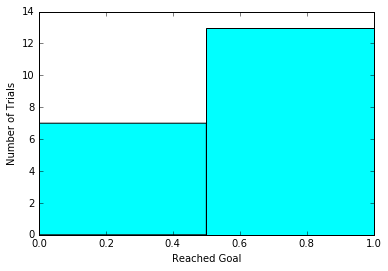

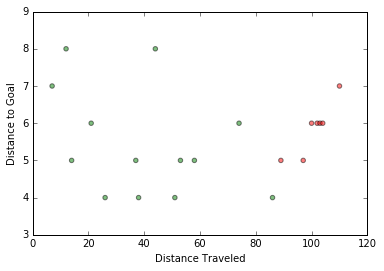

In [3]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

**Answer: ** 

See above analysis of twenty logged trials. The agent does reaches the goal the majority of the time (13 of 20 or 65%) however there does not seem to be a correlation in the scatter plot between the original distance to the goal and how far the agent has to travel to reach it (aside from the fact that the longer distance traveled points tend to not reach the goal but the deadline instead). Even some of the longest distances to the goal result in the shorter distances traveled by the agents. 

The key behavior noticed that seems outside of what is expected is that the grid space is toroidal - if the agent moves forward facing up on the top row, it reappears at the bottom row in that column and similarly on the left and right columns. This should partially explain the above observation about the larger distances to goals because the agent could have randomly taken a shortcut across the boundary to a goal that has a calculated Manhattan style distance that does not take into account the space "wrapping."

### Inform the Driving Agent

Now that your driving agent is capable of moving around in the environment, your next task is to identify a set of states that are appropriate for modeling the smartcab and environment. The main source of state variables are the current inputs at the intersection, but not all may require representation. You may choose to explicitly define states, or use some combination of inputs as an implicit state. At each time step, process the inputs and update the agent's current state using the self.state variable. Continue with the simulation deadline enforcement enforce_deadline being set to False, and observe how your driving agent now reports the change in state as the simulation progresses.

### Question:

What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

**Answer: ** 

These five conditions are the key descriptors of full state model:
- The next waypoints (forward, left, right)
- The color of the light (red or green)
- The existance of and next waypoint of forward oncoming traffic (None, forward, left, right)
- The existance of and next waypoint of left oncoming traffic (None, forward, left, right)
- The existance of and next waypoint of right oncoming traffic (None, forward, left, right)

The combinations of these five conditions describe all the states that guide our smartcab's decision making so that it can learn:

### Optional:

How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

**Answer: ** 

There are 384 total possible states for the smartcab agent based on the combinations of the five conditions above. This is found by multiplying the number of possible options for each condition (3x2x4x4x4=384). This is a rather large number of possible states because the agent needs to visit each one multiple times to learn which decision is better for the next waypoint. (In the Q Learning video the theory expects we visit each state an infinite number of times to converge.)

In [4]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':14,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':9,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':8,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':22,'steps':21 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':9,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':4,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':11,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':4,'steps':3 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')

print df

   reached  goal_distance  distance_traveled  steps  color
0     True            7.0               14.0   13.0  green
1     True            4.0                9.0    8.0  green
2     True            8.0               13.0   12.0  green
3     True            4.0                8.0    7.0  green
4     True            4.0                7.0    6.0  green
5     True            6.0               12.0   11.0  green
6     True            7.0               22.0   21.0  green
7     True            4.0                5.0    4.0  green
8     True            5.0               13.0   12.0  green
9     True            6.0                9.0    8.0  green
10    True            5.0               10.0    9.0  green
11    True            4.0                6.0    5.0  green
12    True            6.0               13.0   12.0  green
13    True            6.0                4.0    3.0  green
14    True            4.0                5.0    4.0  green
15    True            6.0                7.0    6.0  gre

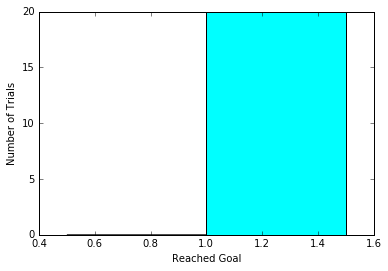

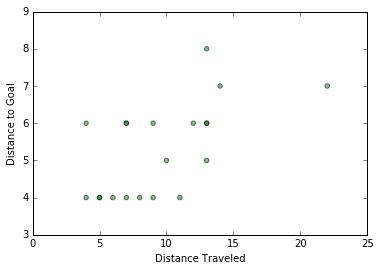

In [5]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

### Observation:
By removing the random next_waypoint assignment, now all of our trials result in a successful reaching of the goal and all of the distances required to reach the goal are far smaller

### Implement a Q-Learning Driving Agent

With your driving agent being capable of interpreting the input information and having a mapping of environmental states, your next task is to implement the Q-Learning algorithm for your driving agent to choose the best action at each time step, based on the Q-values for the current state and action. Each action taken by the smartcab will produce a reward which depends on the state of the environment. The Q-Learning driving agent will need to consider these rewards when updating the Q-values. Once implemented, set the simulation deadline enforcement enforce_deadline to True. Run the simulation and observe how the smartcab moves about the environment in each trial.

In [21]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':31,'steps':30 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':36,'steps':35 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':4,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':10,'distance_traveled':40,'steps':40 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':25,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':4,'steps':4 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':14,'steps':14 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':25,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':17,'steps':17 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':9,'distance_traveled':46,'steps':45 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':17,'steps':17 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':17,'steps':17 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':10,'distance_traveled':30,'steps':30 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':4,'distance_traveled':21,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':3,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':26,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':25,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':3,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':21,'steps':21 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':3,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':3,'steps':3 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':19,'steps':19 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':21,'steps':21 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':31,'steps':30 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':22,'steps':22 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':4,'distance_traveled':21,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':17,'steps':17 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)

runfile('C:/Users/gAkos/Documents/GitHub/machine-learning/projects/smartcab/smartcab/agent.py', wdir='C:/Users/gAkos/Documents/GitHub/machine-learning/projects/smartcab/smartcab')
Reloaded modules: planner, environment, simulator
df=df.append( { 'reached':False,'goal_distance':4,'distance_traveled':21,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':26,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':8,'distance_traveled':41,'steps':40 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':8,'distance_traveled':41,'steps':40 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':17,'steps':17 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':24,'steps':24 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':24,'steps':24 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':24,'steps':24 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':26,'steps':25 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':24,'steps':24 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':31,'steps':30 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':10,'distance_traveled':42,'steps':42 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':5,'steps':5 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':36,'steps':35 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':11,'distance_traveled':26,'steps':26 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':40,'steps':40 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':9,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':6,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':14,'steps':14 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':10,'steps':10 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':36,'steps':35 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':18,'steps':18 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':1,'steps':1 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':16,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':20,'steps':20 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':13,'steps':13 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':7,'steps':7 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':27,'steps':27 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':11,'steps':11 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':10,'distance_traveled':36,'steps':36 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':8,'steps':8 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':15,'steps':15 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':12,'steps':12 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':9,'steps':9 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':31,'steps':30 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':11,'steps':11 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')
df['speed'] = df['steps'] / df['goal_distance']
df['efficiency'] = df['distance_traveled'] / df['goal_distance']
print df

SyntaxError: invalid syntax (<ipython-input-21-a9d775800e70>, line 105)

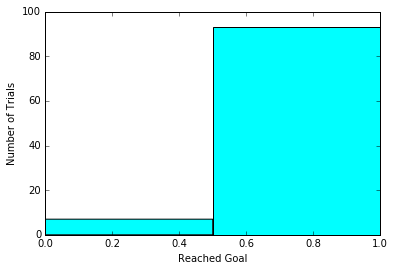

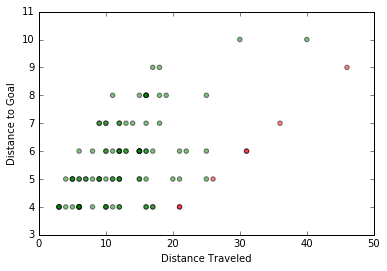

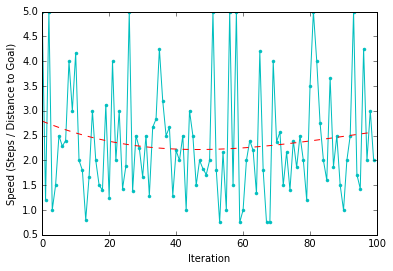

In [23]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

# the speed over time to see if the agent is learning
x = df.index
z = np.polyfit(df.index,df['speed'],3)
p = np.poly1d(z)
plt.plot(x, df['speed'],'c.-',x,p(x),'r--')
plt.xlabel('Iteration')
plt.ylabel('Speed (Steps / Distance to Goal)')
plt.show()


### Question:

What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

**Answer: ** 

Compared to the previous step which had all successful achievements of the goal position, we now have some failures with the deadline set to true. There is also a correlation to when in the sequence of iterations - there are more failures in the earlier iterations. This is to be expected as the agent learns the best set of actions. The max q function will priveledge the first action in the list of permissable actions (None) when all are set to equivalent values, which means that it will tend towards not proceeding at first.

The clearest strategy observed after the first few iterations by the agent is a macro "L" movement. The random agent wiggles through the grid, but the agent that learns looks to move straight until at the level in the grid where the goal is, then turns directly towards it.

Lastly, looking at the line chart above with a trendline in place, we can see that our overall speed (number of time steps divided by the Manhattan distance to the goal) looks to be decreasing over time at least for the first half of the trials. The agent does have some failures that skew the graph (see speed of 5 later along the line) because the agent is still learning the best actions as it is fully exploring the state space.

## Improve the Q-Learning Driving Agent

Your final task for this project is to enhance your driving agent so that, after sufficient training, the smartcab is able to reach the destination within the allotted time safely and efficiently. Parameters in the Q-Learning algorithm, such as the learning rate (alpha), the discount factor (gamma) and the exploration rate (epsilon) all contribute to the driving agent’s ability to learn the best action for each state. To improve on the success of your smartcab:

- Set the number of trials, n_trials, in the simulation to 100.
- Run the simulation with the deadline enforcement enforce_deadline set to True (you will need to reduce the update delay update_delay and set the display to False).
- Observe the driving agent’s learning and smartcab’s success rate, particularly during the later trials.
- Adjust one or several of the above parameters and iterate this process.

This task is complete once you have arrived at what you determine is the best combination of parameters required for your driving agent to learn successfully.